In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
import nltk
import emoji
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
from pymorphy3 import MorphAnalyzer
from nltk.tokenize import word_tokenize

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_V.csv', encoding='MacCyrillic', sep=';')

In [3]:
df.columns.values[-1] = 'Время'
df

,Источник,Инцидент,Количество комментариев,Количество репостов,Время
0,vk.com/novgorod_life_1,"Уважаемая администрация, в нашем районе уже не...",25,10,06.10.2023 8:15
1,vk.com/novgorod_news_2,"Сегодня в Великом Новгороде солнечная погода, ...",5,2,01.10.2023 14:45
2,vk.com/novgorod_alert_3,"Крик души! В нашем дворе стая собак, уже неско...",30,12,01.10.2023 9:30
3,vk.com/novgorod_blog_4,"Глава региона, когда решится вопрос с разбитым...",20,8,06.10.2023 16:20
4,vk.com/novgorod_life_1,Погиб человек в ДТП на трассе М-11. Соболезнов...,50,20,01.10.2023 11:10
5,vk.com/novgorod_daily_5,Обращаюсь к губернатору! В деревне нет света т...,40,15,06.10.2023 7:25
6,vk.com/novgorod_social_6,Сегодня в Новгороде открылась новая детская пл...,7,1,07.10.2023 18:05
7,vk.com/novgorod_life_7,"БПЛА был замечен в небе над районом, жители об...",35,18,07.10.2023 12:50
8,vk.com/novgorod_alert_3,"Отказали в помощи пенсионерке, обратилась в по...",28,14,02.10.2023 10:15
9,vk.com/novgorod_life_7,"Сегодня в центре города концерт, приходите нас...",10,3,07.10.2023 13:40


In [4]:
df = df.drop_duplicates(subset = ['Инцидент'])

## 1 Предобработка данных

### 1.1 Текстовая обработка

In [7]:
# Загрузка необходимых ресурсов NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Инициализация
stop_words = set(stopwords.words('russian'))
morph = MorphAnalyzer()
EXCEPTIONS = {"бпла", "нет"}

def clean_text(text):
    """Очищает текст от HTML, эмодзи, цифр и пунктуации."""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r'\d+', '', text).translate(str.maketrans("", "", string.punctuation)).lower().strip()
    return text

def lemmatize_text(text):
    """Лемматизирует текст, учитывая исключения."""
    words = word_tokenize(text)
    return " ".join(word if word in EXCEPTIONS else morph.parse(word)[0].normal_form for word in words)

def remove_stopwords(text):
    """Удаляет стоп-слова, кроме исключений."""
    return " ".join(word for word in text.split() if word not in stop_words or word in EXCEPTIONS)

# Применение обработки
df['clean_content'] = df['Инцидент'].astype(str).apply(lambda text: remove_stopwords(lemmatize_text(clean_text(text))))

# Векторизация
X = TfidfVectorizer(max_features=10000, ngram_range=(1, 3)).fit_transform(df['clean_content'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fylht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fylht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.2 Описание ключевых атибутов для текстовой обработки

- `text = BeautifulSoup(text, "html.parser").get_text()` – Удаляет HTML-разметку из текста.
- `text = emoji.replace_emoji(text, replace="")` – Удаляет эмодзи.
- `text = re.sub(r'\d+', '', text).translate(str.maketrans("", "", string.punctuation)).lower().strip()` – Удаляет цифры, знаки пунктуации и приводит текст к нижнему регистру.
- `words = word_tokenize(text)` – Токенизирует текст на отдельные слова.
- `text = " ".join(word if word in EXCEPTIONS else morph.parse(word)[0].normal_form for word in words)` – Лемматизирует текст, сохраняя заданные исключения.
- `text = " ".join(word for word in text.split() if word not in stop_words or word in EXCEPTIONS)` – Удаляет стоп-слова, но сохраняет исключения.
- `df['clean_content'] = df['Инцидент'].astype(str).apply(lambda text: remove_stopwords(lemmatize_text(clean_text(text))))` – Применяет полную обработку текста к столбцу "Инцидент".
- `X = TfidfVectorizer(max_features=10000, ngram_range=(1, 3)).fit_transform(df['clean_content'])` – Векторизует очищенный текст с использованием TF-IDF с учетом униграмм, биграмм и триграмм.

In [10]:
# Настройка отображения DataFrame
pd.set_option('display.max_colwidth', None)  # Отключаем обрезку текста в столбцах
pd.set_option('display.expand_frame_repr', False)  # Отключаем перенос строк
df[['Инцидент', 'clean_content']]

,Инцидент,clean_content
0,"Уважаемая администрация, в нашем районе уже неделю нет воды! Примите меры!",уважаемый администрация наш район неделя нет вода принять мера
1,"Сегодня в Великом Новгороде солнечная погода, жители наслаждаются выходными.",сегодня великий новгород солнечный погода житель наслаждаться выходной
2,"Крик души! В нашем дворе стая собак, уже несколько раз нападали на детей!",крик душа наш двор стая собака несколько нападать ребёнок
3,"Глава региона, когда решится вопрос с разбитыми дорогами? Жители ждут ответа!",глава регион решиться вопрос разбитый дорога житель ждать ответ
4,Погиб человек в ДТП на трассе М-11. Соболезнования семьям погибших.,погибнуть человек дтп трасса м соболезнование семья погибнуть
5,Обращаюсь к губернатору! В деревне нет света третий день подряд!,обращаться губернатор деревня нет свет третий день подряд
6,"Сегодня в Новгороде открылась новая детская площадка, дети рады!",сегодня новгород открыться новый детский площадка ребёнок рада
7,"БПЛА был замечен в небе над районом, жители обеспокоены.",бпла заметить небо район житель обеспокоить
8,"Отказали в помощи пенсионерке, обратилась в поликлинику, но её не приняли!",отказать помощь пенсионерка обратиться поликлиника её принять
9,"Сегодня в центре города концерт, приходите насладиться музыкой!",сегодня центр город концерт приходить насладиться музыка


## 2 Построение и отбор признаков

### 2.1 Кластеризация

In [13]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Векторизация текста
vectorizer = TfidfVectorizer(ngram_range=(1,4), max_features=10000)
X_tfidf = vectorizer.fit_transform(df['clean_content'])

# Нормализация числовых признаков
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[['Количество комментариев', 'Количество репостов']])

# Объединяем текстовые и числовые признаки
X_combined = hstack([X_tfidf, X_numeric])

# Применяем KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_combined)

print("Распределение постов по кластерам:")
print(df['cluster'].value_counts())

Распределение постов по кластерам:
cluster
0    26
1    19
Name: count, dtype: int64


### 2.2 Статистические характеристики для каждого кластера

In [37]:
# Группируем по кластерам и рассчитываем статистики
cluster_stats = df.groupby('cluster').agg({
    'Количество комментариев': ['mean', 'median', 'std', 'min', 'max'],
    'Количество репостов': ['mean', 'median', 'std', 'min', 'max'],
})

# Печатаем статистику по каждому кластеру
print(cluster_stats)
df

        Количество комментариев                          Количество репостов                         
                           mean median       std min max                mean median       std min max
cluster                                                                                              
0                     31.346154   30.0  6.817286  22  50           13.576923   13.0  3.008961   9  20
1                     11.368421   10.0  4.399628   5  20            3.631579    3.0  2.241292   1   8


,Источник,Инцидент,Количество комментариев,Количество репостов,Время,clean_content,cluster,is_incident,PCA_1,PCA_2
0,vk.com/novgorod_life_1,"Уважаемая администрация, в нашем районе уже неделю нет воды! Примите меры!",25,10,06.10.2023 8:15,уважаемый администрация наш район неделя нет вода принять мера,0,1,0.500781,-0.187803
1,vk.com/novgorod_news_2,"Сегодня в Великом Новгороде солнечная погода, жители наслаждаются выходными.",5,2,01.10.2023 14:45,сегодня великий новгород солнечный погода житель наслаждаться выходной,1,0,-0.132841,-0.037449
2,vk.com/novgorod_alert_3,"Крик души! В нашем дворе стая собак, уже несколько раз нападали на детей!",30,12,01.10.2023 9:30,крик душа наш двор стая собака несколько нападать ребёнок,0,1,-0.046023,-0.078513
3,vk.com/novgorod_blog_4,"Глава региона, когда решится вопрос с разбитыми дорогами? Жители ждут ответа!",20,8,06.10.2023 16:20,глава регион решиться вопрос разбитый дорога житель ждать ответ,1,1,-0.055909,0.051554
4,vk.com/novgorod_life_1,Погиб человек в ДТП на трассе М-11. Соболезнования семьям погибших.,50,20,01.10.2023 11:10,погибнуть человек дтп трасса м соболезнование семья погибнуть,0,1,-0.036714,0.426508
5,vk.com/novgorod_daily_5,Обращаюсь к губернатору! В деревне нет света третий день подряд!,40,15,06.10.2023 7:25,обращаться губернатор деревня нет свет третий день подряд,0,1,0.224861,-0.054780
6,vk.com/novgorod_social_6,"Сегодня в Новгороде открылась новая детская площадка, дети рады!",7,1,07.10.2023 18:05,сегодня новгород открыться новый детский площадка ребёнок рада,1,0,-0.268013,-0.093589
7,vk.com/novgorod_life_7,"БПЛА был замечен в небе над районом, жители обеспокоены.",35,18,07.10.2023 12:50,бпла заметить небо район житель обеспокоить,0,1,0.061590,-0.010394
8,vk.com/novgorod_alert_3,"Отказали в помощи пенсионерке, обратилась в поликлинику, но её не приняли!",28,14,02.10.2023 10:15,отказать помощь пенсионерка обратиться поликлиника её принять,0,1,0.045040,-0.004788
9,vk.com/novgorod_life_7,"Сегодня в центре города концерт, приходите насладиться музыкой!",10,3,07.10.2023 13:40,сегодня центр город концерт приходить насладиться музыка,1,0,-0.295875,-0.270038


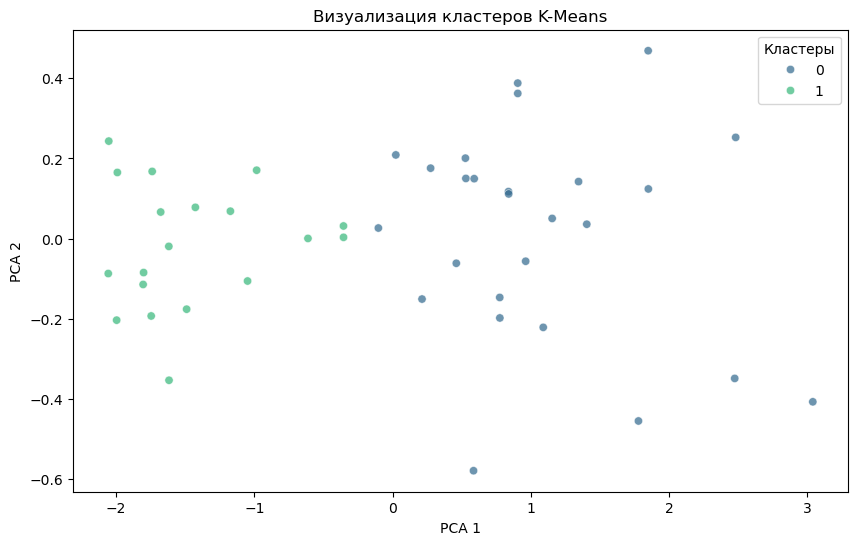

In [43]:
import seaborn as sns

# Применяем PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined.toarray())  # Преобразуем разреженную матрицу в обычный массив

# Добавляем результаты PCA в DataFrame
df['PCA_1'] = X_pca[:, 0]
df['PCA_2'] = X_pca[:, 1]

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA_1'], y=df['PCA_2'], hue=df['cluster'], palette="viridis", alpha=0.7)
plt.title("Визуализация кластеров K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластеры")
plt.show()

### 2.3 Классификация

In [17]:
incident_phrases = [
    'уважаемая администрация', 'неуважаемая администрация', 'крик души', 'примите меры',
    'обращаюсь от лица жителей', 'глава региона', 'обращаюсь к губернатору',
    'отсутствует свет', 'нет света', 'нет воды', 'нет электричества', 'нет транспорта',
    'нет автобуса', 'погибли', 'получил травму', 'травмировался', 'бпла', 'дрон',
    'взрыв', 'обвалился', 'обвал', 'стая собак', 'напала собака', 'укусила собака',
    'бродячие собаки', 'отказали помощи', 'отказали обращении', 'аварийное состояние'
]

# Лемматизируем фразы из списка заранее
incident_phrases = [lemmatize_text(phrase) for phrase in incident_phrases]

In [18]:
# 🔹 2. Классификация (по результатам кластеризации)
# Создаем целевую переменную (инцидент или нет)
df['is_incident'] = df.apply(lambda row: 1 if (
    any(phrase in row['clean_content'] for phrase in incident_phrases) and
    row['Количество комментариев'] > 15 and row['Количество репостов'] > 5) else 0, axis=1)

# Разделяем данные на X (признаки) и y (целевая переменная)
X = X_tfidf
y = df['is_incident']

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Обучаем модель Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Предсказания
y_pred = clf.predict(X_test)

# Оцениваем качество модели
print("\nКлассификация инцидентов:")
print(classification_report(y_test, y_pred))
df


Классификация инцидентов:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



,Источник,Инцидент,Количество комментариев,Количество репостов,Время,clean_content,cluster,is_incident
0,vk.com/novgorod_life_1,"Уважаемая администрация, в нашем районе уже неделю нет воды! Примите меры!",25,10,06.10.2023 8:15,уважаемый администрация наш район неделя нет вода принять мера,0,1
1,vk.com/novgorod_news_2,"Сегодня в Великом Новгороде солнечная погода, жители наслаждаются выходными.",5,2,01.10.2023 14:45,сегодня великий новгород солнечный погода житель наслаждаться выходной,1,0
2,vk.com/novgorod_alert_3,"Крик души! В нашем дворе стая собак, уже несколько раз нападали на детей!",30,12,01.10.2023 9:30,крик душа наш двор стая собака несколько нападать ребёнок,0,1
3,vk.com/novgorod_blog_4,"Глава региона, когда решится вопрос с разбитыми дорогами? Жители ждут ответа!",20,8,06.10.2023 16:20,глава регион решиться вопрос разбитый дорога житель ждать ответ,1,1
4,vk.com/novgorod_life_1,Погиб человек в ДТП на трассе М-11. Соболезнования семьям погибших.,50,20,01.10.2023 11:10,погибнуть человек дтп трасса м соболезнование семья погибнуть,0,1
5,vk.com/novgorod_daily_5,Обращаюсь к губернатору! В деревне нет света третий день подряд!,40,15,06.10.2023 7:25,обращаться губернатор деревня нет свет третий день подряд,0,1
6,vk.com/novgorod_social_6,"Сегодня в Новгороде открылась новая детская площадка, дети рады!",7,1,07.10.2023 18:05,сегодня новгород открыться новый детский площадка ребёнок рада,1,0
7,vk.com/novgorod_life_7,"БПЛА был замечен в небе над районом, жители обеспокоены.",35,18,07.10.2023 12:50,бпла заметить небо район житель обеспокоить,0,1
8,vk.com/novgorod_alert_3,"Отказали в помощи пенсионерке, обратилась в поликлинику, но её не приняли!",28,14,02.10.2023 10:15,отказать помощь пенсионерка обратиться поликлиника её принять,0,1
9,vk.com/novgorod_life_7,"Сегодня в центре города концерт, приходите насладиться музыкой!",10,3,07.10.2023 13:40,сегодня центр город концерт приходить насладиться музыка,1,0


In [19]:
# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Точность модели (Accuracy): {accuracy}")

🔹 Точность модели (Accuracy): 0.8


### 2.4 Информация об инцидентах

In [22]:
# Отфильтруем только инциденты
incidents = df[df['is_incident'] == 1]

# Сгруппируем данные по сообществу
result = (
    incidents.sort_values(by='Время')  # Сортируем строки по времени
    .groupby('Источник')
    .agg(
        Количество_инцидентов=('Инцидент', 'count'),
        Список_инцидентов=('Инцидент', list)  # Собираем инциденты в список
    )
    .reset_index()
)

result

,Источник,Количество_инцидентов,Список_инцидентов
0,vk.com/novgorod_alert_3,12,"[Крик души! В нашем дворе стая собак, уже несколько раз нападали на детей!, Отказали в помощи пенсионерке, обратилась в поликлинику, но её не приняли!, Примите меры! На улице Ленина из-за аварии нет воды весь день!, Нет автобуса по маршруту №7, жители вынуждены добираться пешком!, Отсутствует свет после аварии на подстанции, работы ведутся. , Погибли три человека в пожаре, причины трагедии выясняются. , Обвалился потолок в подъезде старого дома, жителям страшно заходить!, Примите меры! В нашем районе нет электричества уже 12 часов!, Бродячая собака бегает возле детской площадки, страшно выпускать детей!, Травмировался пешеход, провалился в открытый люк на улице Советской!, Взрыв газа в жилом доме, эвакуированы 30 человек, есть пострадавшие. , Нет транспорта вечером, последний автобус уходит слишком рано!]"
1,vk.com/novgorod_blog_4,1,"[Глава региона, когда решится вопрос с разбитыми дорогами? Жители ждут ответа!]"
2,vk.com/novgorod_daily_5,1,[Обращаюсь к губернатору! В деревне нет света третий день подряд!]
3,vk.com/novgorod_life_1,3,"[Погиб человек в ДТП на трассе М-11. Соболезнования семьям погибших. , Уважаемая администрация, в нашем районе уже неделю нет воды! Примите меры!, Обвалился фасад здания на улице Ломоносова, никто не пострадал. ]"
4,vk.com/novgorod_life_7,2,"[Дрон упал на жилой дом, причина происшествия устанавливается. , БПЛА был замечен в небе над районом, жители обеспокоены. ]"
5,vk.com/novgorod_news_2,5,"[Напала собака во дворе школы, ребёнок получил травмы. , Укусила собака возле супермаркета, хозяин даже не попытался помочь!, Нет света в домах после сильного ливня, администрация молчит!, Отказали в обращении в больнице, врачи не приняли пациента!, Глава региона, в нашем посёлке аварийное состояние моста, срочно нужен ремонт!]"
